### Tensorflow 介紹

- TensorFlow是一個機器學習的開發平台，可提供使用者以ANN, CNN, SVM等機器學習演算法開發程式。
- 開發者可使用Python與C++運行Tensorflow，但較多開發者使用Python
- TensorFlow有cpu與gpu兩個版本，訓練大型的網路時，一般會選用gpu的版本訓練，速度約快數十倍。
- TensorFlow可運行於一個或多個的cpu及gpu，還可運行於嵌入式系統中，ex:手機或是平板。

[Tensorflow](https://www.tensorflow.org)

### Deep Learning

<font size="4">深度學習是機器學習(Machine learning)的一個分支，希望把資料透過多個處理層(layer)中的線性或非線性轉換(linear or non-linear transform)，自動抽取出足以代表資料特性的特徵(feature)。在傳統的機器學習中，特徵通常是透過由人力撰寫的演算法產生出來的，需要經過各領域的專家對資料進行許多的分析及研究，了解資料的特性後，才能產生出有用、效果良好的特徵。這樣的過程就是特徵工程(Feature engineering)。
深度學習具有自動抽取特徵(feature extraction)的能力，也被視為是一種特徵學習(Feature Learning, representation learning)，可以取代專家的特徵工程所花費的時間。帶著強大的自動特徵抽取的能力，深度學習在以往機器學習一直無法突破的應用，得到非常驚人的優異表現，使以往認為電腦無法做到的事，變成了可能。

類神經網路是一種模仿生物神經系統的數學模型。在類神經網路中，通常會有數個階層，每個階層中會有數十到數百個神經元(neuron)，神經元會將上一層神經元的輸入加總後，進行活化函數(Activation function)的轉換，當成神經元的輸出。每個神經元會跟下一層的神經元有特殊的連接關係，使上一層神經元的輸出值經過權重計算(weight)後傳遞給下一層的神經元。
為了模擬生物的神經網路，活化函數通常是一種非線性的轉換。傳統的活化函數為Sigmoid函數或雙曲正切函數(hyperbolic tan, tanh)，但是在深度神經網路中，Sigmoid函數的學習效果比較差，常會使用ReLU函數(Rectified linear unit)。
類神經網路的架構指的就是階層數量、每層中的神經元數量、各層之間神經元的連接方式、及活化函數的類型等設定。這些參數設定都是在使用類神經網路前需要由人力設定好的，參數設定的好壞也是大大影響到類神經網路的效能表現。類神經網路的學習和訓練過程就是試著找到最佳的權重設定。</font>

### MNIST 類神經網路

#### import 所需套件

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

#### 將MNIST手寫字資料載入

In [2]:
mnist = keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

#### 列印資料集shape

In [3]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_y[0]

5

#### 顯示圖片

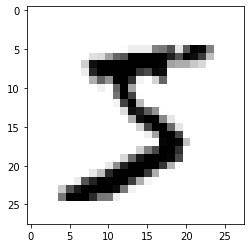

In [6]:
plt.figure()
plt.imshow(train_x[0], cmap=plt.cm.binary)
plt.show()

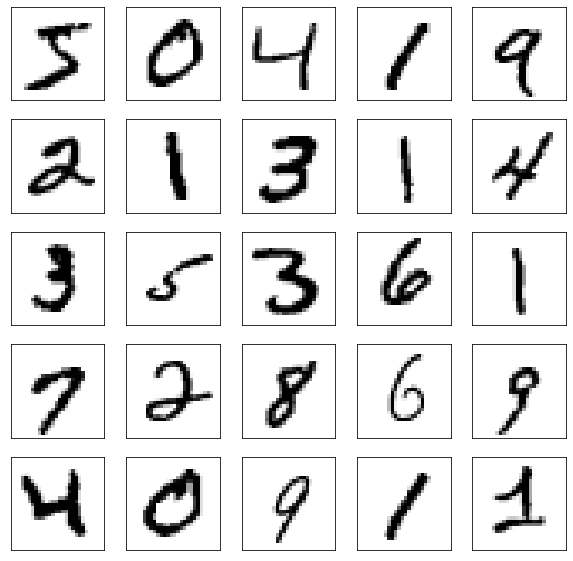

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_x[i], cmap=plt.cm.binary)
plt.show()

#### 資料正規化

In [24]:
train_x = train_x /255.0
test_x = test_x / 255.0

#### 搭建類神經網路
    一層輸入層，一層隱藏層與一層輸出層
    
[mnist]: https://leemeng.tw/images/manim/mnist-simple.jpg
![MNIST][mnist]

    神經網絡結構的輸出為所有輸入的加權和，這導致整個神經網絡是一個線性模型。如果將每一個神經元的輸出通過一個非線性函數，那麼整個神經網絡的模型也就不再是線性的了，使得神經網絡可以更好地解決較為複雜的問題。這個非線性函數也就是激活函數。
    神經網絡中激活函數的主要作用是提供網絡的非線性建模能力，如不特別說明，激活函數一般而言是非線性函數。假設一個示例神經網絡中僅包含線性卷積和全連接運算，那麼該網絡僅能夠表達線性映射，即便增加網絡的深度也依舊還是線性映射，難以有效建模實際環境中非線性分佈的數據。加入（非線性）激活函數之後，深度神經網絡才具備了分層的非線性映射學習能力。因此，激活函數是深度神經網絡中不可或缺的部分。

[tf.keras.activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)<br>
[激活函数（Activation Functions）原理解析](https://blog.csdn.net/brucewong0516/article/details/78834332)

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### 損失函數
在回歸的問題中，我們通常希望模型很棒，預測出來的東西可以跟實際的值一樣。但現實是不可能預測出的值跟實際值是一樣的，預測出來的東西基本上跟實際值都會有落差，這個落差在統計上稱為「殘差(residual)」。
換個角度解釋，如果我們是做股票預測模型，我們預測指數應該到10000點，結果實際是11000點，中間差了1000點，如果我們照著模型去投資，我們是不是損失了1000點的差異，所以應該不會有人用「我們模型跟實際值有1000點的殘差」來解釋吧。
所以損失函數中的損失就是「實際值和預測值的殘差」。

[process]: https://ithelp.ithome.com.tw/upload/images/20171215/20001976zsaI93lw3n.png
![process][process]

[tf.keras.loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

#### 優化器
優化算法的功能，是通過改善訓練方式，來最小化(或最大化)損失函數E(x)。

模型內部有些參數，是用來計算測試集中目標值Y的真實值和預測值的偏差程度的，基於這些參數，就形成了損失函數E(x)。

比如說，權重(W)和偏差(b)就是這樣的內部參數，一般用於計算輸出值，在訓練神經網絡模型時起到主要作用。

在有效地訓練模型並產生準確結果時，模型的內部參數起到了非常重要的作用。這也是為什麼我們應該用各種優化策略和算法，來更新和計算影響模型訓練和模型輸出的網絡參數，使其逼近或達到最優值。

[優化器論文](https://arxiv.org/pdf/1609.04747.pdf)

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6583 - accuracy: 0.5570
Epoch 2/10
1875/1875 [==============================] - 1s 677us/step - loss: 0.5226 - accuracy: 0.8686
Epoch 3/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.3905 - accuracy: 0.8940
Epoch 4/10
1875/1875 [==============================] - 2s 951us/ste

#### 評估準確度

In [30]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)
print('Test accuracy:', test_acc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.2455 - accuracy: 0.9285
Test accuracy: 0.9284999966621399


In [31]:
predictions = model.predict(test_x)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [32]:
np.argmax(predictions[0])

7

In [33]:
test_y[0]

7

#### 儲存以及載入模型

In [16]:
model.save("mnist.h5")

In [17]:
new_model = keras.models.load_model("mnist.h5")

### 辨識一張新的圖片

C:\Users\Jason\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
d:\anaconda\envs\tf\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


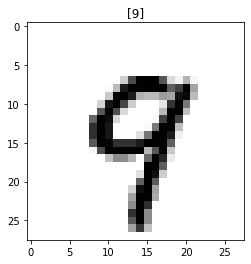

In [42]:
image_path = "unknown_digits/9.png"
new_image = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
img = np.array(new_image)
img = np.expand_dims(img,0)
img = img / 255.0
predict = new_model.predict_classes(img)

plt.imshow(new_image, cmap=plt.cm.binary)
plt.title(predict)
plt.show()

#### np.expand_dims

In [19]:
a = np.array([[[1,2,3],[4,5,6]]])
print(a)
a.shape

[[[1 2 3]
  [4 5 6]]]


(1, 2, 3)

In [20]:
b = np.expand_dims(a, axis=0)
print(b)
b.shape

[[[[1 2 3]
   [4 5 6]]]]


(1, 1, 2, 3)

In [21]:
c = np.expand_dims(a, axis=0)
print(c)
c.shape

[[[[1 2 3]
   [4 5 6]]]]


(1, 1, 2, 3)

In [22]:
d = np.expand_dims(a, axis=0)
print(d)
d.shape

[[[[1 2 3]
   [4 5 6]]]]


(1, 1, 2, 3)